In [45]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('dataset.csv')

In [47]:
data['Unnamed: 0'] = data['Unnamed: 0'].apply(lambda x: 0 if x.startswith('brca') 
    else (1 if x.startswith('prad') 
        else (2 if x.startswith('luad') else  print("unexpected label"))))

data = data.loc[1 :, (data != 0).any(axis=0)]


X = data.drop(columns=['Unnamed: 0'])

data = data.loc[data.sum(axis=1).sort_values(ascending=False).index]

y = data['Unnamed: 0']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist'  # Faster for high-dimensional data
)

In [50]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-mlogloss:1.09268
[1]	validation_0-mlogloss:1.08803


/Users/masongill/Desktop/Projects/MachineLearning/midterm/env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-mlogloss:1.08248
[3]	validation_0-mlogloss:1.07802
[4]	validation_0-mlogloss:1.07481
[5]	validation_0-mlogloss:1.07091
[6]	validation_0-mlogloss:1.06746
[7]	validation_0-mlogloss:1.06425
[8]	validation_0-mlogloss:1.06032
[9]	validation_0-mlogloss:1.05668
[10]	validation_0-mlogloss:1.05405
[11]	validation_0-mlogloss:1.05120
[12]	validation_0-mlogloss:1.04861
[13]	validation_0-mlogloss:1.04650
[14]	validation_0-mlogloss:1.04370
[15]	validation_0-mlogloss:1.04220
[16]	validation_0-mlogloss:1.04107
[17]	validation_0-mlogloss:1.03939
[18]	validation_0-mlogloss:1.03741
[19]	validation_0-mlogloss:1.03608
[20]	validation_0-mlogloss:1.03479
[21]	validation_0-mlogloss:1.03339
[22]	validation_0-mlogloss:1.03230
[23]	validation_0-mlogloss:1.03160
[24]	validation_0-mlogloss:1.03006
[25]	validation_0-mlogloss:1.02847
[26]	validation_0-mlogloss:1.02743
[27]	validation_0-mlogloss:1.02695
[28]	validation_0-mlogloss:1.02567
[29]	validation_0-mlogloss:1.02516
[30]	validation_0-mlogloss:1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [51]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    'Gene': X.columns,
    'Importance': importance
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

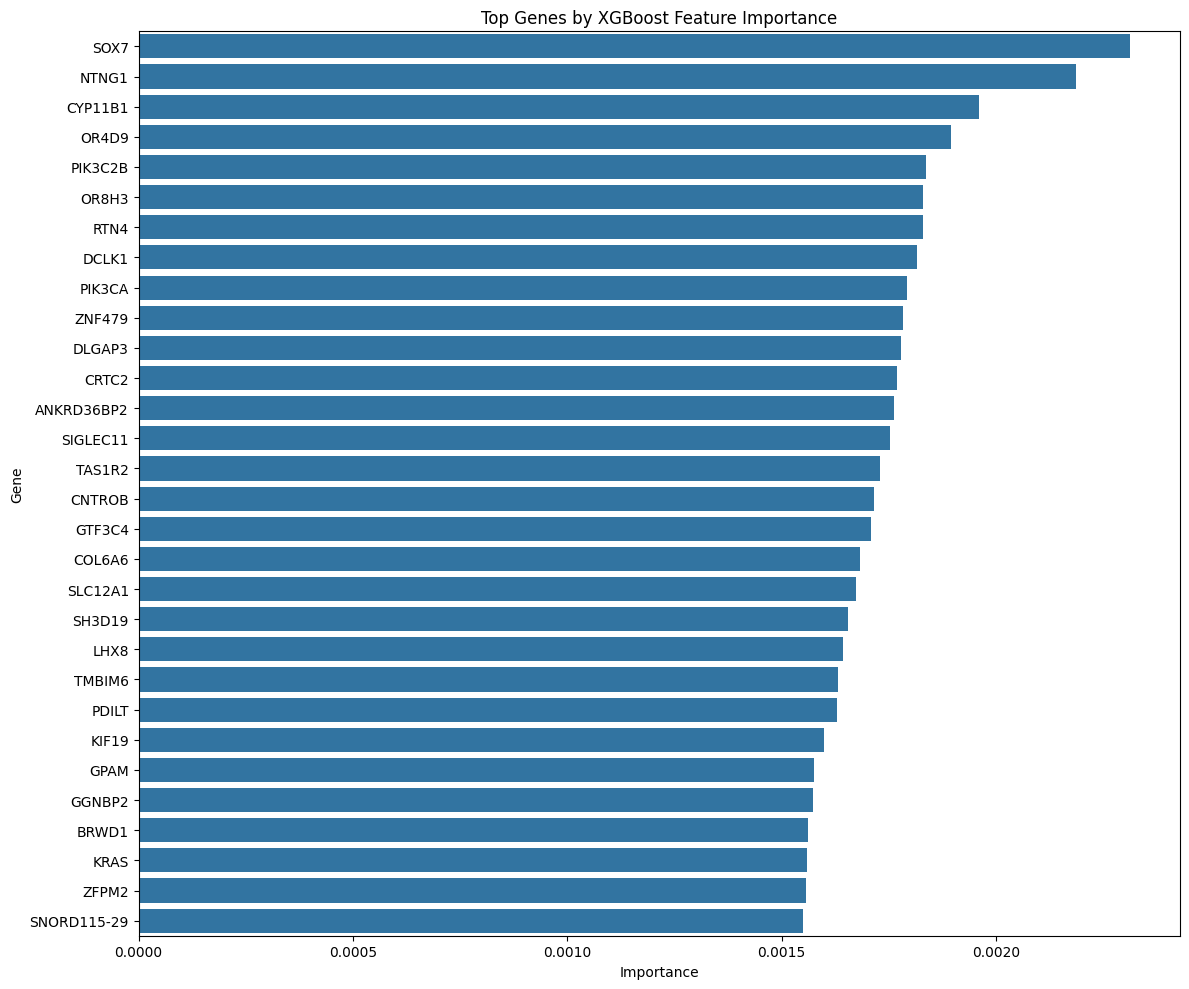

In [55]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Gene', data=feature_importance.head(30))
plt.title('Top Genes by XGBoost Feature Importance')
plt.tight_layout()

plt.show()